<b><h2 id="toc">Table of Contents</h2></b>
<br>
<ol>
    <li>
        <a href="#1"><b>Problem Statement</b><a>
    </li>
    <br>
    <li>
        <b><a href="#2">Loading Dataset</a></b>
    </li>
    <br>
    <li>
        <b><a href="#3">Creating Profile Reports</a></b>
        <ul>
            <li>
                <a href="#3.1">Dataset Understanding</a>
            </li>
            <li>
                <a href="#3.2">Before Preprocessing</a>
            </li>
            <li>
                <a href="#3.3">After Preprocessing</a>
            </li>
        </ul>
    </li>       
    <br>
    <li>
        <b><a href="#4">Data Analysis</a></b>
        <ul>
            <li>
                <a href="#4.1">Question 1.</a>
            </li>
            <li>
                <a href="#4.2">Question 2.</a>
            </li>
            <li>
                <a href="#4.3">Question 3.</a>
            </li>
            <li>
                <a href="#4.4">Question 4.</a>
            </li>
    <br>
    <li>
        <b><a href="#5">Models & Algorithms</a></b>
        <ul>
            <li>
                <a href="#5.1">Preparing X and Y using Pandas</a>
            </li>
            <li>
                <a href="#5.2">Splitting X and Y into Training and Test datasets</a>
            </li>
            <li>
                <a href="#a1a">Algorithm 1a - Logistic Regression without GridSearchCV</a>
            </li>
            <li>
                <a href="#a1b">Algorithm 1b - Logistic Regression with GridSearchCV</a>
            </li>
            <li>
                <a href="#a2">Algorithm 2 - Decision Tree Classifier</a>
            </li>
            <li>
                <a href="#a3">Algorithm 3 - Random Forest Classifier</a>
            </li>
        </ul>
    </li>
    <br>
    <li>
        <b><a href="#6">Conclusion</a></b>
    </li>
</ol>
    
    
        
    

<a name="1"></a>
<h3 id="ps">1. Problem Statement</h3>

<p> 
    This jupyter notebook contains a detailed analysis of diabetes dataset, which has been imported from
    github. It will illustrate the basic commands of Python and Machine Learning algorithms executed in reference 
    to the provided dataset.
</p>
<a name="2"></a>
<h3 id="ldata">2. Loading Dataset</h3>
<p>
    <img src="https://www.nps.org.au/assets/_510x318_crop_center-center_75_none/GettyImages-921720384.jpg">
</p>
<ul>
    <li>
        The dataset consists of information about the records of Diabetic patients (Courtesy UCI). Features used for giving the     details of the patients are: Number of times pregnant, Plasma glucose concentration, Diastolic blood pressure, Triceps skin     fold thickness, 2 Hour serum insulin, Body mass index, Diabetes pedigree function, Age and Class' list.
    </li>
</ul>
<h4 id="ip">Importing Packages</h4>


In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
sns.set_style("dark")
sns.set()

from sklearn import metrics
from subprocess import check_output

%matplotlib inline

# Installation 
!pip install scikit 
!pip install <library>

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x0000024E0B3AC8D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/scikit/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x0000024E0B910780>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/scikit/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x0000024E0B9107F0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/scikit/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)

<h4 id="check">Check Versions of Libraries</h4>

In [3]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
scipy: 1.2.1
numpy: 1.16.2
matplotlib: 3.0.3
pandas: 0.24.2
sklearn: 0.20.3


<h4 id="loadlib">Loading Libraries</h4>

In [4]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

<h4 id="imdata">Importing the Dataset</h4>

In [7]:
import pandas as pd
diab = pd.read_csv("https://raw.githubusercontent.com/MateLabs/Public-Datasets/master/Datasets/diabetes.csv")
diab.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


<h4 id="copy">Creating a copy</h4>
<p>
    Creating a copy of Diabetes record dataset before performing any further operations.
</p>

In [8]:
diab_copy = diab
diab_copy.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


<a name="3"></a>
<h3 id="cpr">3. Creating Profile Reports</h3>
    <ul>
            <li>
                First section contains the understanding of data, its shape, information, not null and null values, etc. In 
                profile reports, firstly, we create a report before preprocessing, then a preprocessing profile report and
                finally, a report after preprocessing, checking how preprocessing has changed our data.
            </li>
    </ul>

<a name="3.1"></a>    
<h4 id="datau">3.1 Dataset Understanding</h4>
<p>
    <b>.format()</b> returns the value we wish to put into the placeholders and concatenate with the string passed as               parameters into the format function.<br>
    <b>.shape</b> returns the dimensions of the array.<br>
    <b>.columns</b> returns the column labels of the dataset
</p>
<a name="3.2"></a>
<h4 id="befp">3.2 Before Processing</h4>
<ul>
    <li>
        An easy to understand, readable and qualitative HTML report is generated which consists of detailed report about
        the attributes, dimensions, minimum and maximum values, mean, median, mode, etc. of the present columns of the
        dataset.
    </li>
    <li>
        A descriptive visual interpretation of column-wise data and the spread of the data is mentioned in the report.
    </li>
    <li>
        Fine and clear dataset analysis is provided.
    </li>
</ul>

<p>
    Here, I have created a profile report before performing processing, that is why it has been named as: 
    "diab_before_processing.html".
</p>


In [9]:
print("Person details: \n{} \n {}".format(diab_copy.shape, diab_copy.columns))

Person details: 
(768, 9) 
 Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age', 'Class'],
      dtype='object')


<p>
    <b>.tail()</b> returns the last 5 rows of the dataset.
</p>

In [10]:
diab_copy.tail()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
763,10,101,76,48,180,32.9,0.171,63,negative
764,2,122,70,27,0,36.8,0.340,27,negative
765,5,121,72,23,112,26.2,0.245,30,negative
766,1,126,60,0,0,30.1,0.349,47,positive
767,1,93,70,31,0,30.4,0.315,23,negative


<p>
    <b>.info()</b> is used to get the concise summary of the dataframe.
</p>

In [11]:
diab_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant        768 non-null int64
Plasma glucose concentration    768 non-null int64
Diastolic blood pressure        768 non-null int64
Triceps skin fold thickness     768 non-null int64
2-Hour serum insulin            768 non-null int64
Body mass index                 768 non-null float64
Diabetes pedigree function      768 non-null float64
Age                             768 non-null int64
Class                           768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


<p>
    <b>describe()</b> is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a           series of numeric values.
</p>

In [12]:
diab_copy.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [13]:
profile = pandas_profiling.ProfileReport(diab_copy)
profile.to_file(outputfile = "C:\\INSAIDTerm3\\diab_before_processing.html")

<p>
    <b>.isnull()</b> shows the presence of null values in columns.<br>
    <b>.sum()</b> shows the sum of values.<br><br>
    <b>Replace zero values in features.</b>
</p>

<p>We saw that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN :</p>

In [14]:
diab_copy[['Number of times pregnant','Plasma glucose concentration','Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin','Body mass index','Age']] = diab_copy[['Number of times pregnant','Plasma glucose concentration','Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin','Body mass index','Age']].replace(0,np.NaN)

In [15]:
diab_copy[['Number of times pregnant','Plasma glucose concentration','Diastolic blood pressure','Triceps skin fold thickness','2-Hour serum insulin','Body mass index','Age']].isnull().head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Age
0,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False
2,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [16]:
diab_copy.isnull().sum()

Number of times pregnant        111
Plasma glucose concentration      5
Diastolic blood pressure         35
Triceps skin fold thickness     227
2-Hour serum insulin            374
Body mass index                  11
Diabetes pedigree function        0
Age                               0
Class                             0
dtype: int64

In [17]:
# Replace using median 
median_NTP = diab_copy['Number of times pregnant'].median()
diab_copy['Number of times pregnant'].fillna(median_NTP, inplace=True)
median_PGC = diab_copy['Plasma glucose concentration'].median()
diab_copy['Plasma glucose concentration'].fillna(median_PGC, inplace=True)
median_DBP = diab_copy['Diastolic blood pressure'].median()
diab_copy['Diastolic blood pressure'].fillna(median_DBP, inplace=True)
median_TSFT = diab_copy['Triceps skin fold thickness'].median()
diab_copy['Triceps skin fold thickness'].fillna(median_TSFT, inplace=True)
median_2HSI = diab_copy['2-Hour serum insulin'].median()
diab_copy['2-Hour serum insulin'].fillna(median_2HSI, inplace=True)
median_BMI = diab_copy['Body mass index'].median()
diab_copy['Body mass index'].fillna(median_BMI, inplace=True)

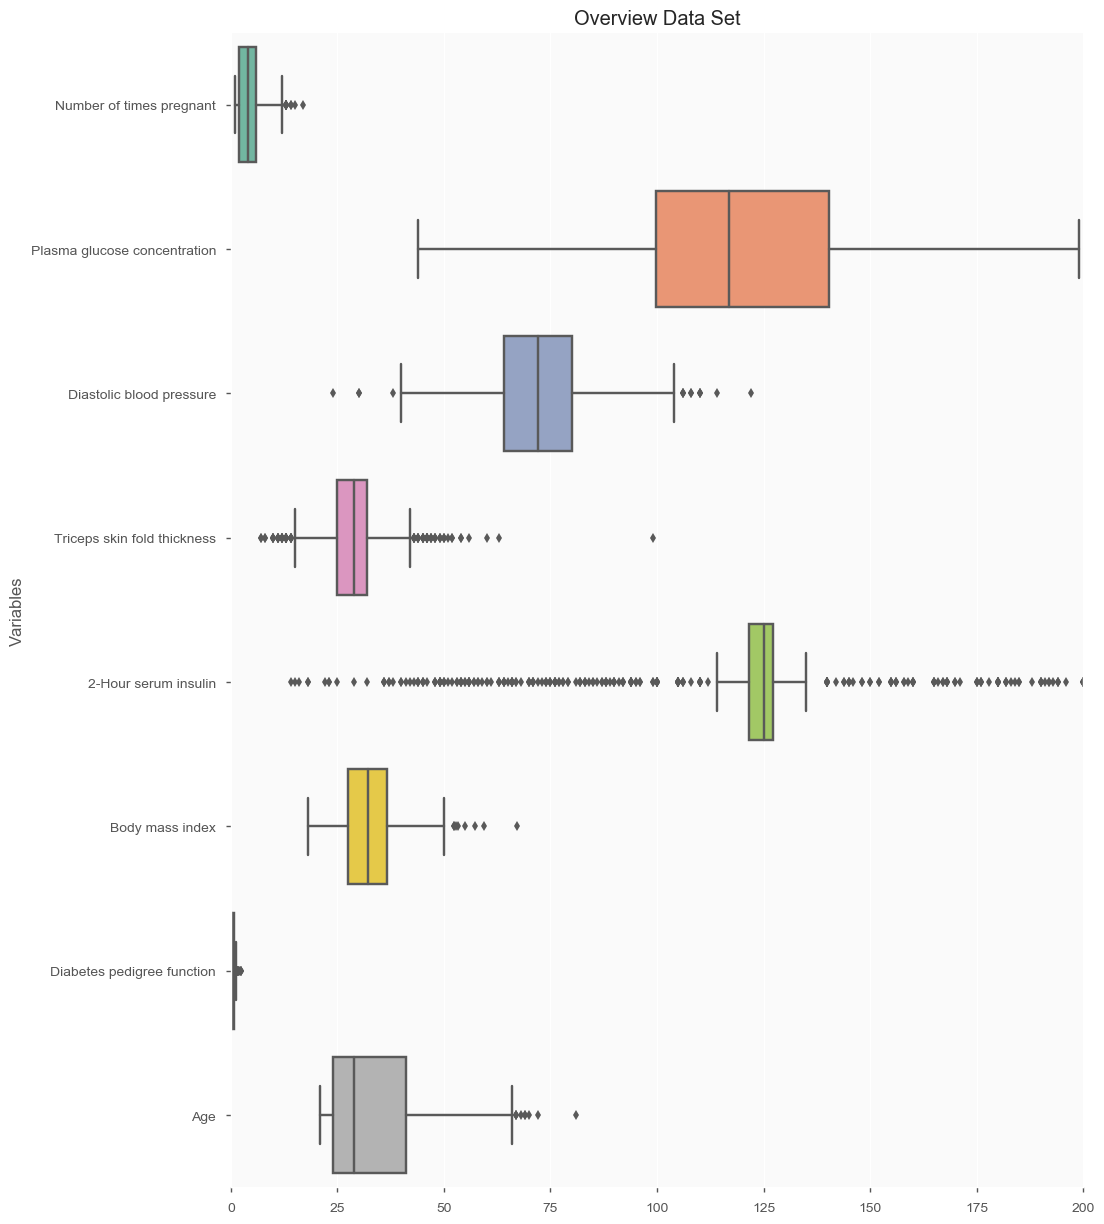

In [18]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = diab_copy, 
  orient = 'h', 
  palette = 'Set2')

<a name="3.3"></a>
<h4 id="aftp">3.3 After Processing</h4>
<p>
    Here, preprocessing is performed on the dataset after the transformation. So, the changes may reflect in the form of: 
    "diab_after_processing.html".<br><br>
    <b>After Cleaning the data.</b>
</p>

In [19]:
profile = pandas_profiling.ProfileReport(diab_copy)
profile.to_file(outputfile = "C:\\INSAIDTerm3\\diab_after_processing.html")
diab_copy.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,positive
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,negative
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,positive
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,negative
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,positive


<h4 id="con">Converting 'Class' values to 0 and 1</h4>

In [20]:
diab_copy['Class'][diab_copy['Class'] == 'positive'] = 1
diab_copy['Class'][diab_copy['Class'] == 'negative'] = 0
diab_copy.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [21]:
# shape
print(diab_copy.shape)

(768, 9)


In [22]:
# class distribution
print(diab_copy.groupby('Class').size())

Class
0    500
1    268
dtype: int64


<a name="4"></a>
<h3 id="dana">4. Data Analysis</h3>
<a name="4.1"></a>
<h4 id="q1">Question 1. What percentage of positive(diabetic) and negative(non-diabetic) people are present in the dataset ?</h4>
<h4 id="a1">Answer 1.</h4>

<p>
    The diabetic patients being 34.9% and non-diabetic being 65.1% as per the pie chart plotted.
</p>



Overall Description of the Dataset


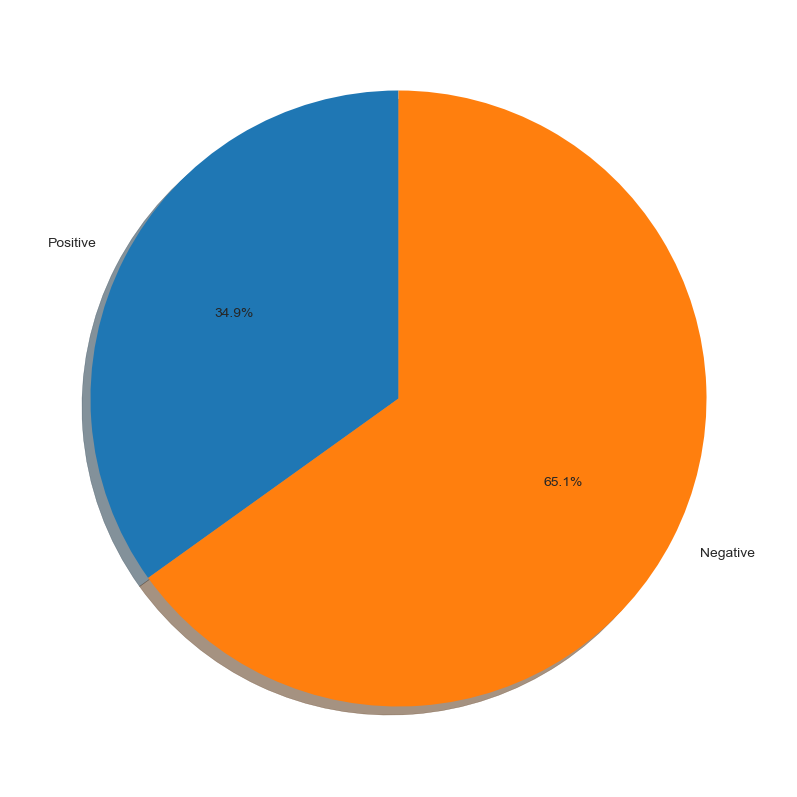

In [23]:
from scipy.stats import gaussian_kde
positive = diab_copy[diab_copy['Class']==1]
negative = diab_copy[diab_copy['Class']==0]
pd.options.display.max_columns = None
print("Overall Description of the Dataset")
pos = positive['Class'].count()
neg = negative['Class'].count()
lis = [pos,neg]
label = ['Positive','Negative']
f,ax = plt.subplots(figsize=(10,10))
plt.pie(lis,labels=label,autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

In [24]:
print("Statistical Desrcription for those who are Diabetic")
print(positive.describe())
print("")
print("Statistical Desrcription for those who are Not-Diabetic")
print(negative.describe())

Statistical Desrcription for those who are Diabetic
       Number of times pregnant  Plasma glucose concentration  \
count                268.000000                    268.000000   
mean                   5.432836                    142.130597   
std                    3.226639                     29.568839   
min                    1.000000                     78.000000   
25%                    3.000000                    119.000000   
50%                    4.000000                    140.000000   
75%                    8.000000                    167.000000   
max                   17.000000                    199.000000   

       Diastolic blood pressure  Triceps skin fold thickness  \
count                268.000000                   268.000000   
mean                  75.123134                    31.686567   
std                   11.951672                     8.662994   
min                   30.000000                     7.000000   
25%                   68.000000           

<a name="4.2"></a>
<h4 id="q2">Question 2. Graph representation of 'Age' feature in respect to Positive and Negative 'Class' ?</h4>
<h4 id="a2">Answer 2.</h4>

<p>As we can see in most of the cases Diabetes starts to affect predominantly in middle age, around 30.</p>


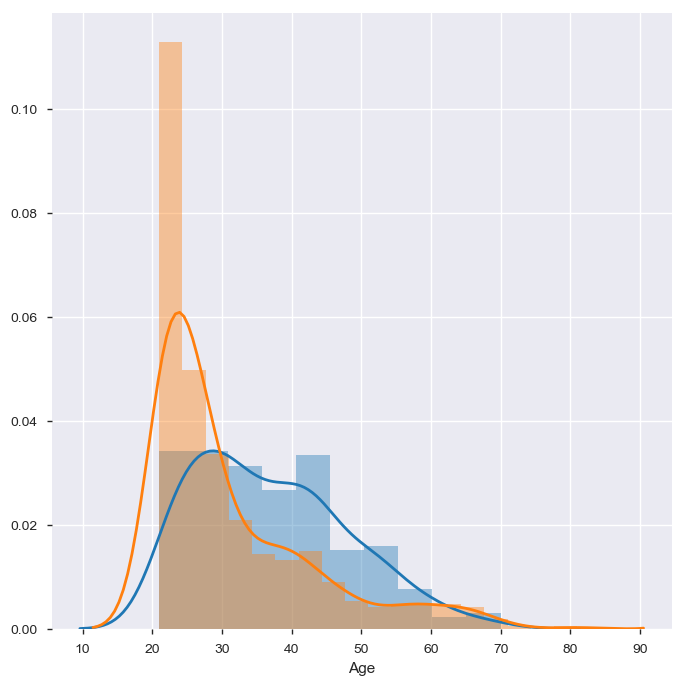

In [25]:
plt.subplots(figsize = (8,8))
sns.distplot(positive['Age'], hist = True, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'Positive(Diabetic)')
sns.distplot(negative['Age'], hist = True, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'Negative(Non-Diabetic)')
plt.show()

<a name="4.3"></a>
<h4 id="q3">Question 3. Build a Heatmap to see correlation between each and every feature ?</h4>
<h4 id="a3">Answer 3.</h4>
<p>correlation between all features have been depicted in the plot.</p>



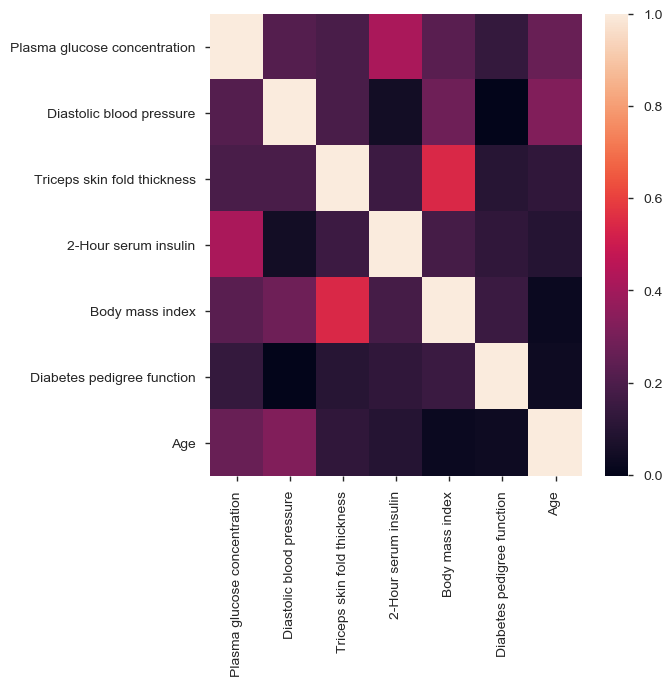

In [26]:
d = diab_copy.iloc[:,1:-1]
plt.subplots(figsize = (6,6))
sns.heatmap(d.corr())
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023904875390>,
      dtype=object)

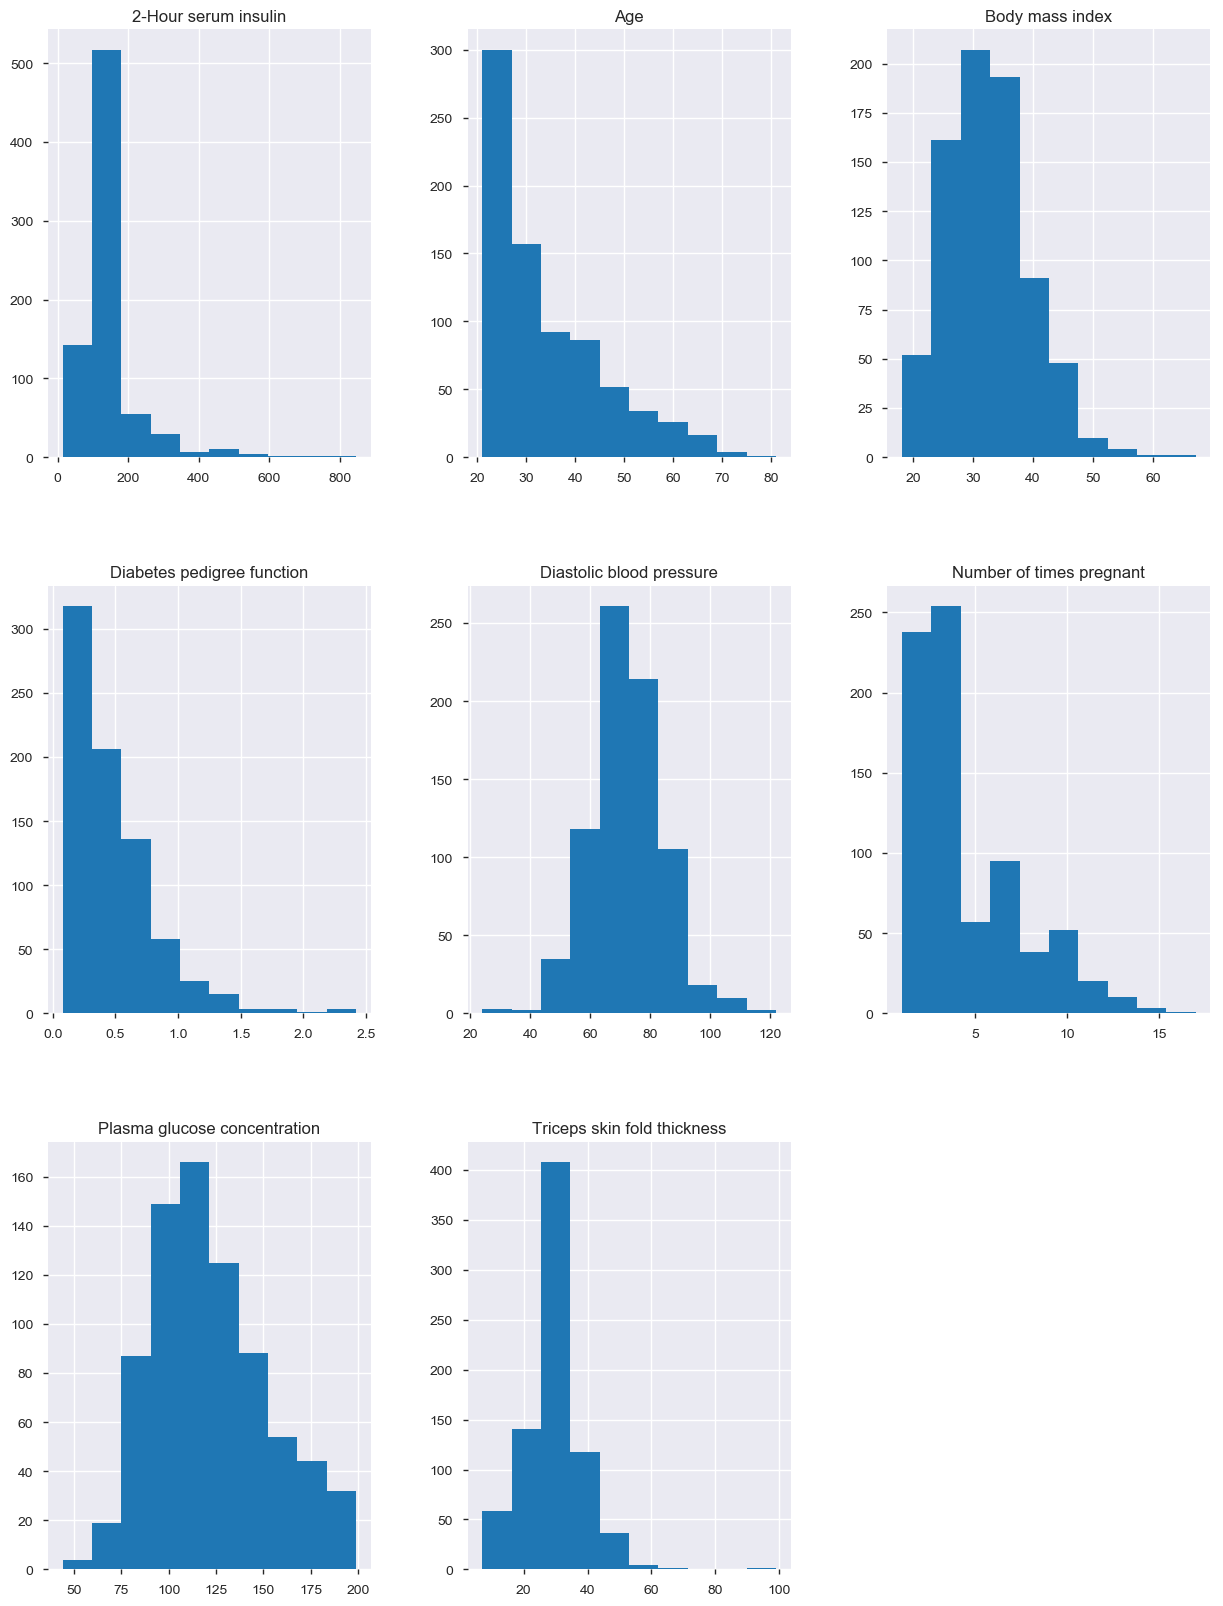

In [27]:
# histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
diab_copy.hist(ax = ax)

<a name="4.4"></a>
<h4 id="q4">Question 4. Plot a scatter matrix plot for the Diabetes dataset ?</h4>
<h4 id="a4">Answer 4.</h4>
<p>A scatter matrix plot depicting the description of each feature is plotted.</p>

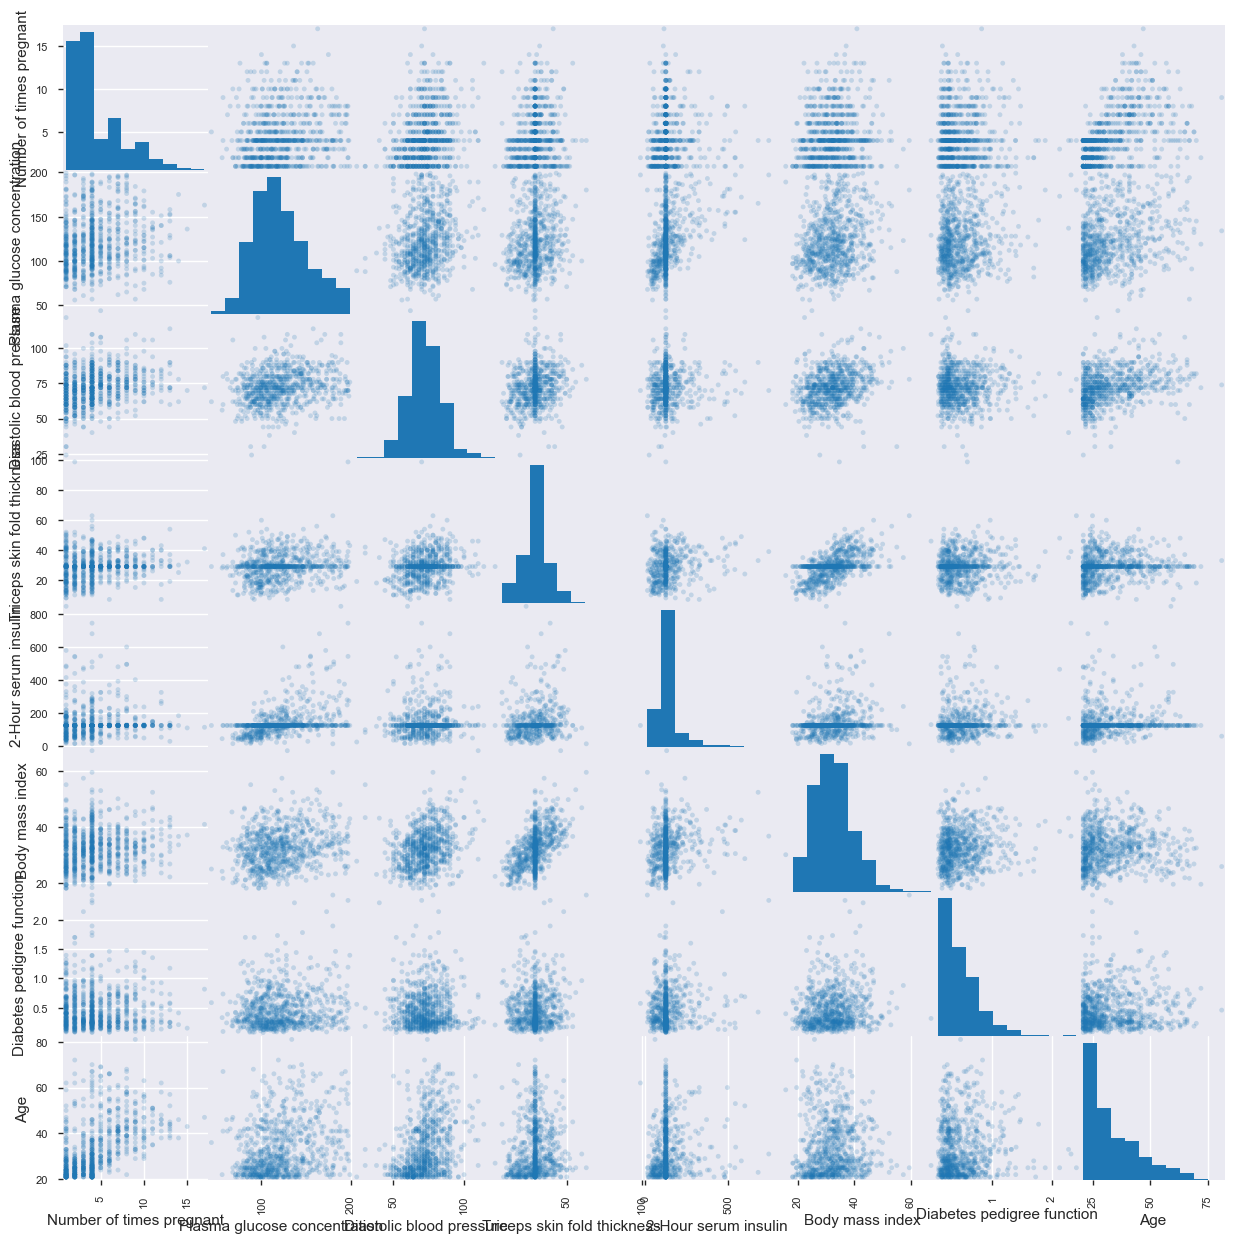

In [28]:
# scatter plot matrix
scatter_matrix(diab_copy, alpha=0.2, figsize=(15,15))
plt.show()

<a name="5"></a>
<h3 id="algo">5. Models & Algorithms</h3>

<p>We have used various models and algorithms here. Linear Regression is not used, for it being categorical data,
    Logistic Regression model, Decision Tree classifier, Random Forest Classifier are being implemented
    to evaluate the accuracy of which model is the most.</p>

<a name="5.1"></a>
<h3 id="prep">5.1 Preparing X and Y using Pandas</h3>

In [29]:
X = diab_copy.iloc[:,0:8]
y = diab_copy.iloc[:,8]
y = y.astype('int')
diab_copy.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<a name="5.2"></a>
<h3 id="split">5.2 Splitting X and Y into Training and Test datasets</h3>

In [30]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [31]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (614, 8)
y_train shape:  (614,)

Test cases as below
X_test shape:  (154, 8)
y_test shape:  (154,)


In [32]:
y_train.describe()

count    614.000000
mean       0.346906
std        0.476373
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

<a name="a1a"></a>
<h3 id="log">Algorithm 1a - Logistic Regression without using GridSearchCV</h3>

In [33]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
pred = logisticRegr.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [35]:
from sklearn import metrics
ac = metrics.accuracy_score(y_test, pred)
print('Accuracy score for test data is:', ac)

Accuracy score for test data is: 0.7662337662337663


<p>Accuracy score of the test data without GridSearchCV is 77.92%</p>

<h4 id="conf">Building the Confusion Matrix</h4>

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, pred))
print(confusion_matrix)

    0   1
0  90   9
1  27  28


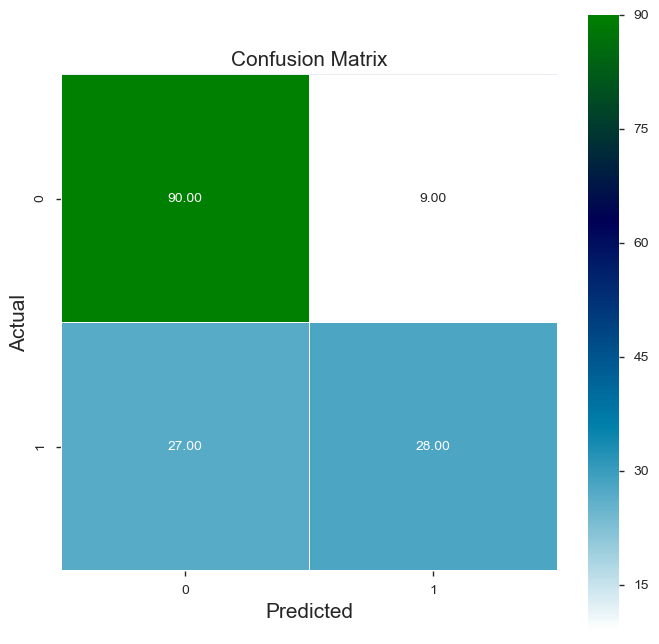

In [37]:
def plot_confusion_matrix(df_confusion):
    plt.figure(figsize=(8,8))
    sns.heatmap(df_confusion, linewidth=.2, fmt='.2f', annot=True, square = True, cmap = 'ocean_r')
    plt.title('Confusion Matrix',size = 15)
    plt.ylabel('Actual', fontsize = 15)
    plt.xlabel('Predicted', fontsize = 15)
    
plot_confusion_matrix(confusion_matrix)

In [38]:
score = logisticRegr.score(X_test, y_test)
score

0.7662337662337663

In [39]:
pred = np.where(logisticRegr.predict_proba(X_test)[:,1] >= .75, 1, 0)
ac = metrics.accuracy_score(y_test, pred)
print('Accuracy score for test data is:', ac)

Accuracy score for test data is: 0.7142857142857143


<h4 id="rec">Evaluating Recall score of the test dataset</h4>

In [40]:
from sklearn.metrics import recall_score
def log():
    recall= recall_score(y_test, pred)
    print('Recall score for test data is:', recall)
    return recall
recall = log()                     

Recall score for test data is: 0.21818181818181817


<h4 id="prec">Evaluating Precision score of the test dataset</h4>

In [41]:
from sklearn.metrics import precision_score
def log():
    precision = precision_score(y_test,pred)
    print('Precison score for test data is:', precision)
    return precision
precision = log()

Precison score for test data is: 0.9230769230769231


<h4 id="prec">Evaluating the Classification Report</h4>

In [42]:
from sklearn.metrics import classification_report
def tree():
    print(classification_report(y_test, pred))
tree()

              precision    recall  f1-score   support

           0       0.70      0.99      0.82        99
           1       0.92      0.22      0.35        55

   micro avg       0.71      0.71      0.71       154
   macro avg       0.81      0.60      0.58       154
weighted avg       0.78      0.71      0.65       154



<a name="a1b"></a>
<h3 id="dt">Algorithm 1b - Using GridSearchCV</h3>

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 60), 'max_features': ['sqrt', 'log2', None]}],
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
y_pred_test1 = grid_search.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.7922077922077922


<p>Accuracy score of the test data without GridSearchCV is 79.87%. Comparatively, accuracy of test data with GridsearchCV is more than without it, that's why this is the best applied model for predicting 'Class' values.</p>

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))
print(confusion_matrix)

    0   1
0  88  11
1  21  34


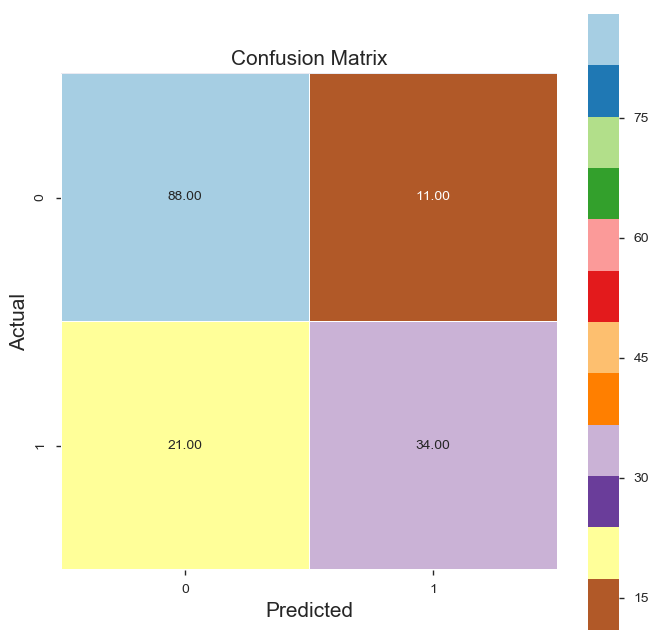

In [47]:
def plot_confusion_matrix(df_confusion):
    plt.figure(figsize=(8,8))
    sns.heatmap(df_confusion, linewidth=.2, fmt='.2f', annot=True, square = True, cmap = 'Paired_r')
    plt.title('Confusion Matrix',size = 15)
    plt.ylabel('Actual', fontsize = 15)
    plt.xlabel('Predicted', fontsize = 15)
    
plot_confusion_matrix(confusion_matrix)

<a name="a2"></a>
<h3 id="dt">Algorithm 2 - Decision Tree Classifier</h3>

In [48]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [49]:
y_pred_train = model.predict(X_train)  
y_pred_train

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

<p>Here is how we interpret the coding:

<b>diab</b> is coded as Status_diab = 1<br>
<b>non</b> is coded as Status_diab = 0</p>

In [50]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [51]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test, y_pred_test))

Accuracy score for test data is: 0.6753246753246753


<p>Accuracy score of the test data without GridSearchCV is 72.72%</p>

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix)

    0   1
0  73  26
1  24  31


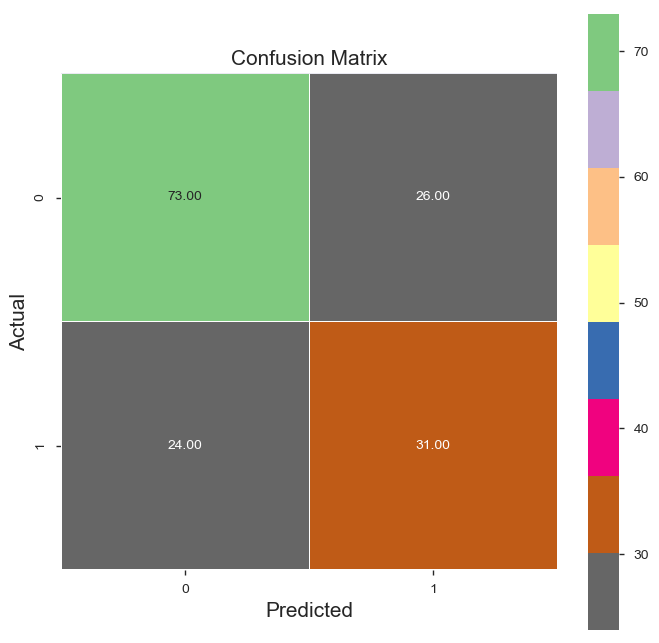

In [53]:
def plot_confusion_matrix(df_confusion):
    plt.figure(figsize=(8,8))
    sns.heatmap(df_confusion, linewidth=.2, fmt='.2f', annot=True, square = True, cmap = 'Accent_r')
    plt.title('Confusion Matrix',size = 15)
    plt.ylabel('Actual', fontsize = 15)
    plt.xlabel('Predicted', fontsize = 15)
    
plot_confusion_matrix(confusion_matrix)

<a name="a3"></a>
<h3 id="rf">Algorithm 3 - Random Forest Classifier</h3>

In [54]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)


model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

<h4 id="model">Using the Model for Prediction</h4>

In [55]:
y_pred_train = model.predict(X_train)

In [56]:
y_pred_test = model.predict(X_test) 

In [57]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.7792207792207793


<p>Accuracy score of the test data without GridSearchCV is 78.57%</p>

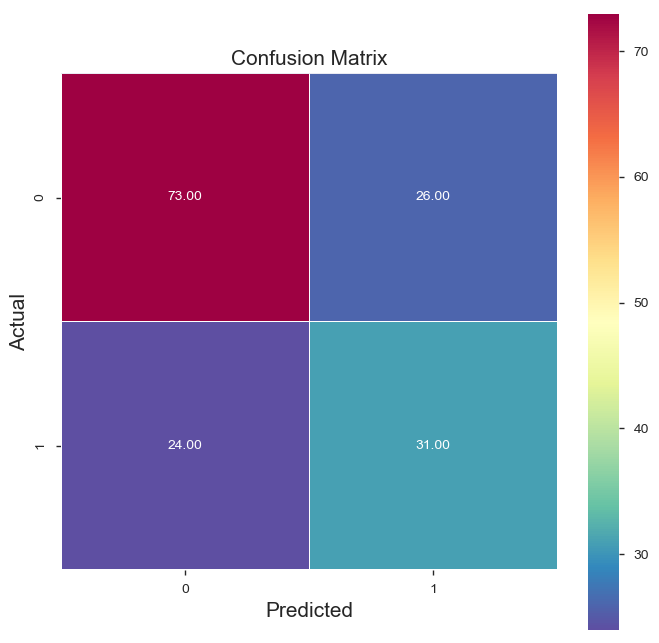

In [58]:
def plot_confusion_matrix(df_confusion):
    plt.figure(figsize=(8,8))
    sns.heatmap(df_confusion, linewidth=.2, fmt='.2f', annot=True, square = True, cmap = 'Spectral_r')
    plt.title('Confusion Matrix',size = 15)
    plt.ylabel('Actual', fontsize = 15)
    plt.xlabel('Predicted', fontsize = 15)
    
plot_confusion_matrix(confusion_matrix)

<a name="6"></a>
<h3 id="conc">6. Conclusion</h3>
<ul>
    <li>
        We have learnt applying different Machine Learning models and algorithms.
    </li>
    <li>
        We have made use of all the models, but Logistic Regression with GridSearchCV has the best accuracy.
    </li>
    <li>
       Thus, we have come to know the best prediction is done by the Logistic regression with GridSearchCV model.
    </li>
</ul>